### MNIST data here consists of handwritten digits with training set of 42,000 examples, and a test set of 28,000 examples.

I will here step-by-step build the model, starting from Linear model to one-layer Convolutional model to big Convolutional model.

In [7]:
## Importing packages

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical

import skimage.transform
import skimage.util
from skimage.io import imread

########

from sklearn.model_selection import train_test_split

# machine learning packages
import tensorflow as tf
from tensorflow.keras import backend as k
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau 
from tensorflow.keras.layers import BatchNormalization, Convolution2D
from tensorflow.keras.layers import Input, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, Dropout
from tensorflow.keras.layers import AveragePooling2D, MaxPooling2D, Dropout, GlobalMaxPooling2D, GlobalAveragePooling2D
from tensorflow.keras.models import Model, Sequential
#from keras.preprocessing import image
#from keras.utils import layer_utils
#from keras.utils.data_utils import get_file
#from keras.applications.imagenet_utils import preprocess_input
#import pydot
#from IPython.display import SVG
#from keras.utils.vis_utils import model_to_dot
#from keras.utils import plot_model
#from kt_utils import *
from tensorflow.keras import optimizers
import preprocessing

### Changed to Keras.something to tensorflow.keras.something to avoid the error the backend issues.
### There were conflicting issues with Tensorflow 2.0 and keras

### Load the train and test data

In [8]:
# reading training data
train=pd.read_csv("../data/train.csv")
test=pd.read_csv("../data/test.csv")

In [6]:
test.shape

(28000, 784)

Each row is a 784 pixels, can be written into 28$\times$28 matrix which represents a digit. Let's drop the first column in order to read rows for digits.

Labels varies from 0 to 9.

In [9]:
X_train_orig = (train.iloc[:,1:].values).astype('float32') # all rows
Y_train_orig = train.iloc[:,0].values.astype('int32') # all labels
X_test_orig = test.values.astype('float32')

Split the data into train and validation datasets

In [10]:
batch_size=64
X_train, X_val, Y_train, Y_val = train_test_split(X_train_orig, Y_train_orig, test_size=0.10, random_state=56)
Y_train=Y_train.astype('int32')
Y_val=Y_val.astype('int32')

### Data Visualization

In [12]:
# To convert train dataset to (num_images, img_rows, img_cols) format 
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test_orig.reshape(X_test_orig.shape[0], 28, 28, 1)
X_val = X_val.reshape(X_val.shape[0], 28, 28,1 )

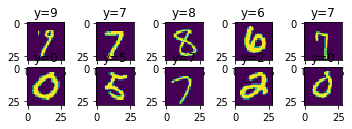

In [13]:
## printing random hand-written digits
indx = np.random.randint(0,len(X_train)-1,size=10)
fig = plt.figure()
for ix in range(10):
    ax = fig.add_subplot(5, 5, 1 + ix)
    ax.imshow(X_train[indx[ix],:,:,0])
    ax.set_title('y='+str(Y_train[indx[ix]]))

In [17]:
## Normalizing the pixels or converting the pixels values between 0 and 1
Xn_train = X_train/255.
Xn_test = X_test/255.
Xn_val = X_val/255.

### One-hot encoding

In [ ]:
#def convert_to_one_hot(Y, C):
#    Y = np.eye(C)[Y.reshape(-1)].T
#    return Y
#Y_train = convert_to_one_hot(Y_train, 10).T
#Y_val = convert_to_one_hot(Y_val, 10).T

In [18]:
Ye_train= to_categorical(Y_train)
Ye_val= to_categorical(Y_val)
nlabels = Ye_train.shape[1]
print('Total number of different labels',nlabels)

Total number of different labels 10


### Linear Model

This model just connects the input layer with the final fully-connected layer with softmax activation.

In [19]:
def LinearModel(input_shape):
    """
    Implementation of the LinearModel.
    
    Arguments:
    input_shape -- shape of the images of the dataset

    Returns:
    model -- a Model() instance in Keras
    """
    # Define the input placeholder as a tensor with shape input_shape. 
    X_input = Input(input_shape)

    # FLATTEN X (means convert it to a vector) + FULLYCONNECTED
    X = Flatten()(X_input)
    X = Dense(10, activation='softmax', name='fc')(X)

    # Create model. This creates your Keras model instance, you'll use this instance to train/test the model.
    model = Model(inputs = X_input, outputs = X, name='LinearModel')
    return model

In [20]:
def lm_run(Model,xdata,ydata,xval,yval,bs):
    model = Model(Xn_train[-1].shape)
    model.compile(optimizers.Adam(lr=0.01), loss="categorical_crossentropy", metrics=["accuracy"])
    history = model.fit(x = Xn_train, y = Ye_train, epochs = 40, batch_size = 64)
    mval =  model.evaluate(x = xval, y = yval)
    return mval,history

In [21]:
val,his=lm_run(LinearModel,Xn_train,Ye_train, Xn_val, Ye_val,64)

Epoch 1/40
37800/37800 [==============================] - 1s 19us/sample - loss: 0.3722 - accuracy: 0.8920
Epoch 2/40
37800/37800 [==============================] - 1s 14us/sample - loss: 0.3037 - accuracy: 0.9132
Epoch 3/40
37800/37800 [==============================] - 1s 14us/sample - loss: 0.2869 - accuracy: 0.9177
Epoch 4/40
37800/37800 [==============================] - 1s 14us/sample - loss: 0.2805 - accuracy: 0.9211
Epoch 5/40
37800/37800 [==============================] - 1s 14us/sample - loss: 0.2753 - accuracy: 0.9212
Epoch 6/40
37800/37800 [==============================] - 1s 14us/sample - loss: 0.2702 - accuracy: 0.9231
Epoch 7/40
37800/37800 [==============================] - 1s 14us/sample - loss: 0.2674 - accuracy: 0.9241
Epoch 8/40
37800/37800 [==============================] - 1s 15us/sample - loss: 0.2637 - accuracy: 0.9249
Epoch 9/40
37800/37800 [==============================] - 1s 15us/sample - loss: 0.2632 - accuracy: 0.9258
Epoch 10/40
37800/37800 [============

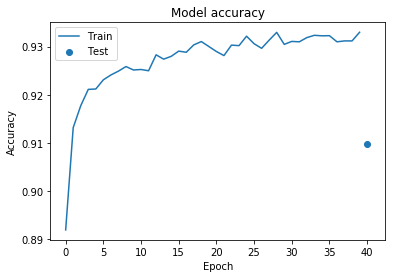

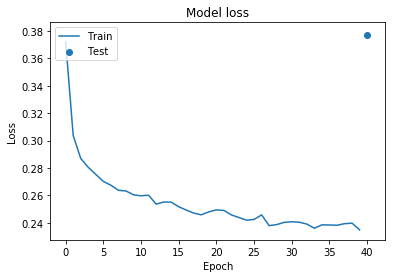

In [22]:
# Plot training & validation accuracy values
plt.plot(his.history['accuracy'])
plt.scatter(40,val[1])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(his.history['loss'])
plt.scatter(40,val[0])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

This linear model gives an accuracy of ~91% and loss of 0.377

### Convulational Model

In [23]:
def ConvModel(input_shape):
    """
    Implementation of the ConvModel.
    
    Arguments:
    input_shape -- shape of the images of the dataset

    Returns:
    model -- a Model() instance in Keras
    """
    # Define the input placeholder as a tensor with shape input_shape. 
    X_input = Input(input_shape)
    
    # Zero-Padding: pads the border of X_input with zeroes
    X = ZeroPadding2D((3, 3))(X_input)

    # CONV -> BN -> RELU Block applied to X
    X = Conv2D(32, (3, 3), strides = (1, 1), name = 'conv0')(X)
    X = BatchNormalization(axis = 3, name = 'bn0')(X)
    X = Activation('relu')(X)

    # MAXPOOL
    X = MaxPooling2D((2, 2), name='max_pool')(X)

    # FLATTEN X (means convert it to a vector) + FULLYCONNECTED
    X = Flatten()(X)
    X = Dense(10, activation='softmax', name='fc')(X)

    # Create model. This creates your Keras model instance, you'll use this instance to train/test the model.
    model = Model(inputs = X_input, outputs = X, name='ConvModel')
    return model

In [24]:
val,his=lm_run(ConvModel,Xn_train,Ye_train, Xn_val, Ye_val,64)

Epoch 1/40
37800/37800 [==============================] - 27s 727us/sample - loss: 0.5365 - accuracy: 0.9211
Epoch 2/40
37800/37800 [==============================] - 27s 718us/sample - loss: 0.0857 - accuracy: 0.9734
Epoch 3/40
37800/37800 [==============================] - 27s 716us/sample - loss: 0.0637 - accuracy: 0.9794
Epoch 4/40
37800/37800 [==============================] - 27s 710us/sample - loss: 0.0506 - accuracy: 0.9839
Epoch 5/40
37800/37800 [==============================] - 27s 716us/sample - loss: 0.0432 - accuracy: 0.9851
Epoch 6/40
37800/37800 [==============================] - 28s 733us/sample - loss: 0.0361 - accuracy: 0.9882
Epoch 7/40
37800/37800 [==============================] - 28s 731us/sample - loss: 0.0328 - accuracy: 0.9893
Epoch 8/40
37800/37800 [==============================] - 27s 707us/sample - loss: 0.0310 - accuracy: 0.9893
Epoch 9/40
37800/37800 [==============================] - 28s 744us/sample - loss: 0.0280 - accuracy: 0.9905
Epoch 10/40
37800/3

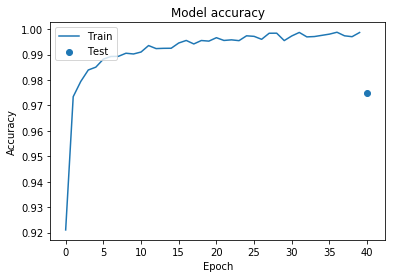

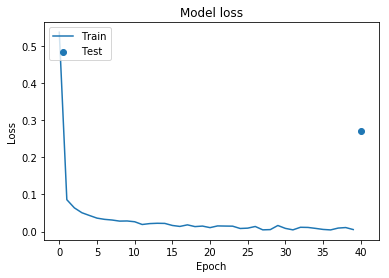

In [25]:
# Plot training & validation accuracy values
plt.plot(his.history['accuracy'])
plt.scatter(40,val[1])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(his.history['loss'])
plt.scatter(40,val[0])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

This one-layer convolutional model gives an accuracy of ~97.4% and loss of 0.2719. The accuracy is increased by 7%.

###  Convolutional Neural Network 



In [26]:
def TestConvModel(input_shape):
    """
    Implementation of the ConvModel.
    
    Arguments:
    input_shape -- shape of the images of the dataset

    Returns:
    model -- a Model() instance in Keras
    """
    # Define the input placeholder as a tensor with shape input_shape. 
    X_input = Input(input_shape)
    
    # 
    X = ZeroPadding2D((2, 2))(X_input)
    X = Conv2D(64,5,5,kernel_initializer='he_normal',padding='same')(X)
    X = Activation('relu')(X)
    X = ZeroPadding2D((2, 2))(X)
    X = Conv2D(128,5,5,kernel_initializer='he_normal',padding='same')(X)
    X = Activation('relu')(X)
    X = MaxPooling2D(strides=(2, 2),padding='same')(X)
   
    #
    X = ZeroPadding2D((2, 2))(X)
    X = Conv2D(256,5,5,kernel_initializer='he_normal',padding='same')(X)
    X = Activation('relu')(X)
    X = ZeroPadding2D((1, 1))(X)
    X = Conv2D(256,3,3,kernel_initializer='he_normal',padding='same')(X)
    X = Activation('relu')(X)
    X = MaxPooling2D(strides=(2, 2),padding='same')(X)
    X = Dropout(0.2)(X)
    
    #
    X = ZeroPadding2D((1, 1))(X)
    X = Conv2D(512,2,3,kernel_initializer='he_normal',padding='same')(X)
    X = Activation('relu')(X)
    X = Dropout(0.2)(X)
    X = ZeroPadding2D((1, 1))(X)
    X = Conv2D(512,3,3,kernel_initializer='he_normal',padding='same')(X)
    X = Activation('relu')(X)
    X = MaxPooling2D(strides=(2, 2),padding='same')(X)
    
    # FLATTEN X (means convert it to a vector) + FULLYCONNECTED
    X = Flatten()(X)
    X = Dropout(0.5)(X)
    X = Dense(2048, activation='relu', kernel_initializer='he_normal')(X)

    predictions = Dense(10, activation="softmax")(X)
    # Create model. This creates your Keras model instance, you'll use this instance to train/test the model.
    model = Model(inputs = X_input, outputs = predictions, name='ConvModel')
    return model

In [27]:
def rotation_and_shear(img, rotation_angle=15, shear_angle=30):
    img = skimage.transform.rotate(img, np.random.randint(-rotation_angle, rotation_angle))
    tf_shift = skimage.transform.SimilarityTransform(translation=(-14, -14))
    tf_inv_shift = skimage.transform.SimilarityTransform(translation=(14, 14))
    tf_shear = skimage.transform.AffineTransform(shear=np.deg2rad(np.random.randint(-shear_angle, shear_angle)))
    img = skimage.transform.warp(img, (tf_shift + (tf_shear + tf_inv_shift)).inverse)
    return img

In [28]:
def add_noise(img, gauss_var=0.02):
    img = skimage.util.random_noise(img, mode='gaussian', var=gauss_var)
    return img

In [29]:
def batch_generator(trainX, trainY, batch_size):
    trainX = trainX.reshape(trainX.shape[0],1,trainX.shape[1],trainX.shape[2])
    while True:
        idxs = np.arange(0, trainY.shape[0])
        np.random.shuffle(idxs)
        for i in range(trainY.shape[0] // batch_size):
            batchX = [trainX[idx] for idx in idxs[i * batch_size : (i+1) * batch_size]]
            batchY = [trainY[idx] for idx in idxs[i * batch_size : (i+1) * batch_size]]
            batchX = [add_noise(rotation_and_shear(img[0])) for img in batchX]
            batchX = np.array(batchX)
            batchX = batchX.reshape(batchX.shape[0], batchX.shape[1], batchX.shape[2], 1)
            #return batchX, batchY
            yield batchX, np.array(batchY)

In [30]:
def run(Model,xdata,ydata,xval,yval,xtest,bs,nb):
    #xdata = xdata.reshape(xdata.shape[0],1,xdata.shape[1],xdata.shape[2])
    model = Model(xdata[-1].shape)
    model.compile(optimizers.Adam(lr=0.001,beta_1=0.9, beta_2=0.999, epsilon=1e-08), loss="categorical_crossentropy", metrics=["accuracy"])
    #es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)
    # reduce the learning rate by factor of 0.5 if the validation loss does not get lower in 7 epochs
    reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=7, min_lr=0.0000001, verbose=1)
    history = model.fit_generator(batch_generator(xdata, ydata, batch_size=bs),steps_per_epoch=np.ceil(ydata.shape[0] / bs),validation_data=(xval, yval),epochs=nb, verbose=1, callbacks=[reduce_lr])
    ##history = model.fit(x = xdata, y = ydata, epochs = 40, batch_size = bs,validation_data= (xval,yval),callbacks=[es])
    mval =  model.evaluate(x = xval, y = yval)
    ytest=model.predict(xtest)
    return mval,history,ytest

In [ ]:
testx,testy=batch_generator(Xn_train, Ye_train, 64)

In [ ]:
Xn_train.shape

In [31]:
val,his,ypred=run(TestConvModel,Xn_train,Ye_train, Xn_val, Ye_val,Xn_test,64,50)

Epoch 1/50
591/591 [==============================] - 228s 386ms/step - loss: 0.5959 - accuracy: 0.8068 - val_loss: 0.1782 - val_accuracy: 0.9543
Epoch 2/50
591/591 [==============================] - 231s 390ms/step - loss: 0.2537 - accuracy: 0.9295 - val_loss: 0.1442 - val_accuracy: 0.9614
Epoch 3/50
591/591 [==============================] - 233s 394ms/step - loss: 0.2031 - accuracy: 0.9435 - val_loss: 0.1158 - val_accuracy: 0.9671
Epoch 4/50
591/591 [==============================] - 231s 392ms/step - loss: 0.1722 - accuracy: 0.9530 - val_loss: 0.1076 - val_accuracy: 0.9710
Epoch 5/50
591/591 [==============================] - 237s 402ms/step - loss: 0.1593 - accuracy: 0.9561 - val_loss: 0.0927 - val_accuracy: 0.9731
Epoch 6/50
591/591 [==============================] - 252s 426ms/step - loss: 0.1476 - accuracy: 0.9600 - val_loss: 0.0995 - val_accuracy: 0.9750
Epoch 7/50
591/591 [==============================] - 264s 447ms/step - loss: 0.1396 - accuracy: 0.9629 - val_loss: 0.0905 -

In [32]:
base_model = TestConvModel(Xn_train[-1].shape)
base_model.summary()

Model: "ConvModel"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
zero_padding2d_7 (ZeroPaddin (None, 32, 32, 1)         0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 7, 7, 64)          1664      
_________________________________________________________________
activation_7 (Activation)    (None, 7, 7, 64)          0         
_________________________________________________________________
zero_padding2d_8 (ZeroPaddin (None, 11, 11, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 3, 3, 128)         204928    
_________________________________________________________________
activation_8 (Activation)    (None, 3, 3, 128)         0 

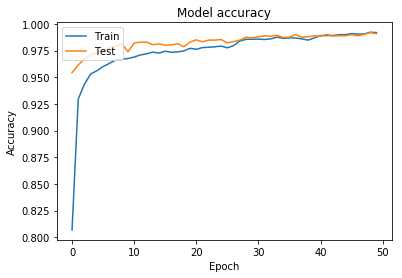

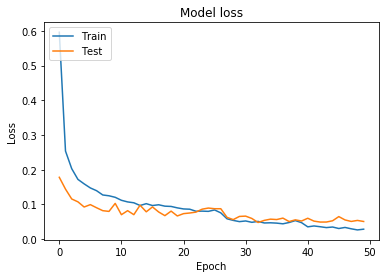

In [33]:
# Plot training & validation accuracy values
plt.plot(his.history['accuracy'])
plt.plot(his.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(his.history['loss'])
plt.plot(his.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

With this model, Training loss becomes less than Test loss after ~35 epochs. This indicates that the model is overfitting. There are two possibilities now -

1. To stop the model fitting till 35 epochs
2. Change the model to a less complicated data

In [58]:
(his.history['loss'][30]-his.history['val_loss'][30])/his.history['loss'][30] * 100

-5.814500582928663

In [59]:
his.history['accuracy'][30]

0.9875212

In [ ]:
Xn_test.shape

In [35]:
ytest=np.argmax(ypred,axis=1)

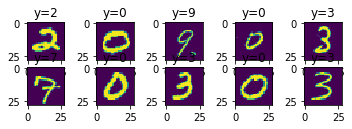

In [41]:
## printing random hand-written digits
indx = np.arange(len(Xn_test)) #np.random.randint(0,len(Xn_test)-1,size=10)
fig = plt.figure()
for ix in range(10):
    ax = fig.add_subplot(5, 5, 1 + ix)
    ax.imshow(Xn_test[indx[ix],:,:,0])
    ax.set_title('y='+str(ytest[indx[ix]]))

In [40]:
image_id = np.arange(len(Xn_test))
submission = pd.DataFrame({
        "ImageId": image_id,
        "Label": ytest
    })
submission.to_csv('submission.csv', index=False)

In [29]:
def Lenet5Model(input_shape):
    """
    Implementation of the ConvModel.
    
    Arguments:
    input_shape -- shape of the images of the dataset

    Returns:
    model -- a Model() instance in Keras
    """
    # Define the input placeholder as a tensor with shape input_shape. 
    X_input = Input(input_shape)
    
    # 
    X = ZeroPadding2D((2, 2))(X_input)
    print(np.shape(X))
    X = Conv2D(6,5,1,kernel_initializer='he_normal')(X)
    print(np.shape(X))
    X = AveragePooling2D(pool_size=(2,2),strides=2)(X)
    print(np.shape(X))
    X = Conv2D(16,5,1,kernel_initializer='he_normal')(X)
    print(np.shape(X))
    X = AveragePooling2D(pool_size=(2,2),strides=2)(X)
    print(np.shape(X))
    X = Flatten()(X)
    print(np.shape(X))
    X = Dense(120, activation='relu', kernel_initializer='he_normal')(X)
    print(np.shape(X))
    X = Dense(84, activation='relu', kernel_initializer='he_normal')(X)
    print(np.shape(X))
    predictions = Dense(10, activation="softmax")(X)
    print(np.shape(predictions))
    # Create model. This creates your Keras model instance, you'll use this instance to train/test the model.
    model = Model(inputs = X_input, outputs = predictions, name='Lenet5Model')
    return model

In [34]:
lval,lhis,lypred=run(Lenet5Model,Xn_train,Ye_train, Xn_val, Ye_val,Xn_test,64,300)

(None, 32, 32, 1)
(None, 28, 28, 6)
(None, 14, 14, 6)
(None, 10, 10, 16)
(None, 5, 5, 16)
(None, 400)
(None, 120)
(None, 84)
(None, 84)
Epoch 1/300
591/591 [==============================] - 21s 36ms/step - loss: 0.4312 - accuracy: 0.8646 - val_loss: 0.1839 - val_accuracy: 0.9469
Epoch 2/300
591/591 [==============================] - 20s 34ms/step - loss: 0.2280 - accuracy: 0.9297 - val_loss: 0.1360 - val_accuracy: 0.9619
Epoch 3/300
591/591 [==============================] - 20s 34ms/step - loss: 0.1825 - accuracy: 0.9426 - val_loss: 0.1100 - val_accuracy: 0.9662
Epoch 4/300
591/591 [==============================] - 20s 34ms/step - loss: 0.1560 - accuracy: 0.9510 - val_loss: 0.1059 - val_accuracy: 0.9724
Epoch 5/300
591/591 [==============================] - 21s 35ms/step - loss: 0.1399 - accuracy: 0.9565 - val_loss: 0.1193 - val_accuracy: 0.9669
Epoch 6/300
591/591 [==============================] - 20s 34ms/step - loss: 0.1329 - accuracy: 0.9570 - val_loss: 0.0999 - val_accuracy: 0

Epoch 53/300
591/591 [==============================] - 20s 34ms/step - loss: 0.0346 - accuracy: 0.9881 - val_loss: 0.0581 - val_accuracy: 0.9843
Epoch 54/300
591/591 [==============================] - 20s 34ms/step - loss: 0.0338 - accuracy: 0.9887 - val_loss: 0.0556 - val_accuracy: 0.9845
Epoch 55/300
591/591 [==============================] - 20s 34ms/step - loss: 0.0362 - accuracy: 0.9880 - val_loss: 0.0555 - val_accuracy: 0.9857
Epoch 56/300
591/591 [==============================] - 20s 35ms/step - loss: 0.0338 - accuracy: 0.9884 - val_loss: 0.0578 - val_accuracy: 0.9855
Epoch 57/300
591/591 [==============================] - 20s 34ms/step - loss: 0.0337 - accuracy: 0.9889 - val_loss: 0.0560 - val_accuracy: 0.9848
Epoch 58/300
591/591 [==============================] - 20s 34ms/step - loss: 0.0363 - accuracy: 0.9879 - val_loss: 0.0568 - val_accuracy: 0.9843
Epoch 59/300
590/591 [============================>.] - ETA: 0s - loss: 0.0335 - accuracy: 0.9884
Epoch 00059: ReduceLROnPla

Epoch 102/300
591/591 [==============================] - 20s 34ms/step - loss: 0.0328 - accuracy: 0.9887 - val_loss: 0.0578 - val_accuracy: 0.9850
Epoch 103/300
591/591 [==============================] - 20s 34ms/step - loss: 0.0309 - accuracy: 0.9900 - val_loss: 0.0578 - val_accuracy: 0.9850
Epoch 104/300
591/591 [==============================] - 20s 34ms/step - loss: 0.0318 - accuracy: 0.9893 - val_loss: 0.0578 - val_accuracy: 0.9850
Epoch 105/300
591/591 [==============================] - 20s 34ms/step - loss: 0.0329 - accuracy: 0.9891 - val_loss: 0.0578 - val_accuracy: 0.9850
Epoch 106/300
591/591 [==============================] - 20s 34ms/step - loss: 0.0342 - accuracy: 0.9890 - val_loss: 0.0578 - val_accuracy: 0.9850
Epoch 107/300
591/591 [==============================] - 20s 34ms/step - loss: 0.0307 - accuracy: 0.9900 - val_loss: 0.0577 - val_accuracy: 0.9850
Epoch 108/300
589/591 [============================>.] - ETA: 0s - loss: 0.0333 - accuracy: 0.9889
Epoch 00108: Reduce

Epoch 151/300
591/591 [==============================] - 20s 34ms/step - loss: 0.0315 - accuracy: 0.9889 - val_loss: 0.0579 - val_accuracy: 0.9848
Epoch 152/300
591/591 [==============================] - 20s 34ms/step - loss: 0.0314 - accuracy: 0.9898 - val_loss: 0.0579 - val_accuracy: 0.9848
Epoch 153/300
591/591 [==============================] - 20s 34ms/step - loss: 0.0338 - accuracy: 0.9896 - val_loss: 0.0579 - val_accuracy: 0.9848
Epoch 154/300
591/591 [==============================] - 20s 34ms/step - loss: 0.0317 - accuracy: 0.9891 - val_loss: 0.0579 - val_accuracy: 0.9848
Epoch 155/300
591/591 [==============================] - 20s 34ms/step - loss: 0.0312 - accuracy: 0.9898 - val_loss: 0.0579 - val_accuracy: 0.9848
Epoch 156/300
591/591 [==============================] - 20s 34ms/step - loss: 0.0327 - accuracy: 0.9893 - val_loss: 0.0579 - val_accuracy: 0.9848
Epoch 157/300
589/591 [============================>.] - ETA: 0s - loss: 0.0311 - accuracy: 0.9894
Epoch 00157: Reduce

KeyboardInterrupt: 

In [38]:
np.shape(Xn_test)

(28000, 28, 28, 1)